In [1]:
import os

In [2]:
import fitsio
import numpy as np
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import lib

In [4]:
lib.plotting.setup()

In [8]:
with fitsio.FITS("/global/cfs/projectdirs/des/atong/y6kp-shear/starsim/catalogs/gaia_y6.fits") as fits:
    gaia_y6 = fits[1].read()

In [10]:
with fitsio.FITS("/global/cfs/projectdirs/des/atong/y6kp-shear/starsim/catalogs/lsst_y6.fits") as fits:
    lsst_y6 = fits[1].read()

In [24]:
with fitsio.FITS("/global/cfs/projectdirs/des/atong/y6kp-shear/starsim/catalogs/merged_y6.fits") as fits:
    merged_y6 = fits[1].read()

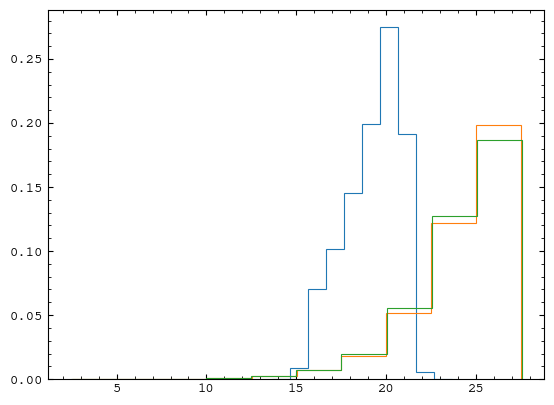

In [25]:
plt.hist(
    gaia_y6["mag_auto_r"],
    histtype="step",
    density=True,
)
plt.hist(
    lsst_y6["rmag"],
    histtype="step",
    density=True,
)
plt.hist(
    lsst_y6["des_rmag"],
    histtype="step",
    density=True,
)
plt.show()

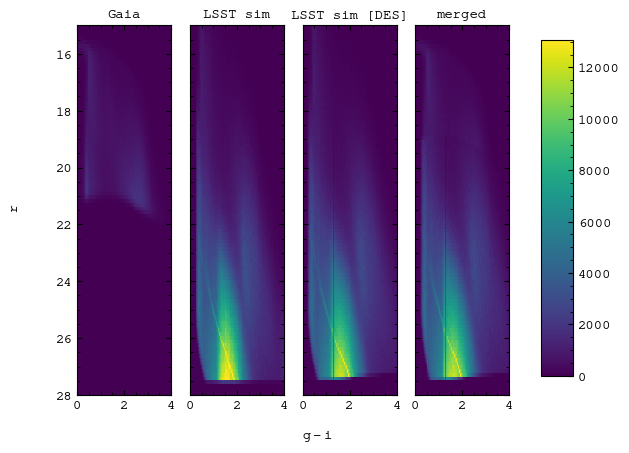

In [62]:
NBINS = 100
bins=[
    np.linspace(0, 4, NBINS + 1),
    np.linspace(15, 28, NBINS + 1),
]

norm = mpl.colors.Normalize()

fig, axs = plt.subplots(1, 4, sharex=True, sharey=True)

axs[3].hist2d(
    merged_y6["gi_color"],
    merged_y6["rmag"],
    bins=bins,
    norm=norm,
    cmap="viridis",
)
axs[3].set_title("merged")
axs[3].invert_yaxis()

axs[0].hist2d(
    gaia_y6["gi_color"],
    gaia_y6["mag_auto_r"],
    bins=bins,
    norm=norm,
    cmap="viridis",
)
axs[0].set_title("Gaia")
axs[0].invert_yaxis()

axs[1].hist2d(
    lsst_y6["gi_color"],
    lsst_y6["rmag"],
    bins=bins,
    norm=norm,
    cmap="viridis",
)
axs[1].set_title("LSST sim")
axs[1].invert_yaxis()

axs[2].hist2d(
    lsst_y6["des_gi_color"],
    lsst_y6["des_rmag"],
    bins=bins,
    norm=norm,
    cmap="viridis",
)
axs[2].set_title("LSST sim [DES]")
axs[2].invert_yaxis()

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap="viridis"), cax=cbar_ax)

fig.supxlabel("$g - i$")
fig.supylabel("$r$")

plt.show()

In [79]:
NBINS = 100
bins=[
    np.linspace(0, 4, NBINS + 1),
    np.linspace(15, 28, NBINS + 1),
]

In [96]:
axis_ratio = (bins[0].max() - bins[0].min()) / (bins[1].max() - bins[1].min())

In [81]:
gaia_hist, _, _ = np.histogram2d(
    gaia_y6["gi_color"],
    gaia_y6["mag_auto_r"],
    bins=bins,
)

In [82]:
lsst_hist, _, _ = np.histogram2d(
    lsst_y6["des_gi_color"],
    lsst_y6["des_rmag"],
    bins=bins,
)

In [83]:
merged_hist, _, _ = np.histogram2d(
    merged_y6["gi_color"],
    merged_y6["rmag"],
    bins=bins,
)

/global/u2/s/smau/projects/des/y6-image-sims-analysis/plots/lib/plotting.py:214: UserWarning: Total axes width (3.1794871794871793) less than figure width (3.3333333333333335)
  warnings.warn(f"Total axes width ({total_width}) less than figure width ({fig_width})")


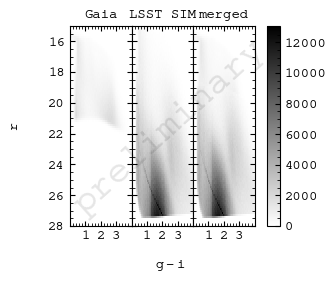

In [111]:
norm = mpl.colors.Normalize()

fig, axs = lib.plotting.make_axes(
    1, 3,
    width=2 * axis_ratio,
    height=2,
    horizontal_margin=8/12,
    vertical_margin=6/12,
    gutter=0,
    fig_width=3 + 4/12,
    fig_height=3,
)

axs[2].imshow(
    merged_hist.T,
    norm=norm,
    origin="lower",
    extent=[bins[0].min(), bins[0].max(), bins[1].min(), bins[1].max()],
)
axs[2].set_title("merged")
axs[2].invert_yaxis()
axs[2].set_xticks([1, 2, 3])
axs[2].set_yticklabels([])

axs[0].imshow(
    gaia_hist.T,
    norm=norm,
    origin="lower",
    extent=[bins[0].min(), bins[0].max(), bins[1].min(), bins[1].max()]
)
axs[0].set_title("Gaia")
axs[0].invert_yaxis()
axs[0].set_xticks([1, 2, 3])

axs[1].imshow(
    lsst_hist.T,
    norm=norm,
    origin="lower",
    extent=[bins[0].min(), bins[0].max(), bins[1].min(), bins[1].max()]
)
axs[1].set_title("LSST SIM")
axs[1].invert_yaxis()
axs[1].set_xticks([1, 2, 3])
axs[1].set_yticklabels([])

lib.plotting.add_colorbar(axs[2], mpl.cm.ScalarMappable(norm=norm))

fig.supxlabel("$g - i$")
fig.supylabel("$r$")

lib.plotting.watermark(fig)

fig.savefig("star_colors.pdf")

plt.show()